In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 12)

In [7]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
df.duplicated().sum()

0

In [9]:
# Handling missing values: fill 'Age' with median, 'Embarked' with mode, drop 'Cabin' due to many missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

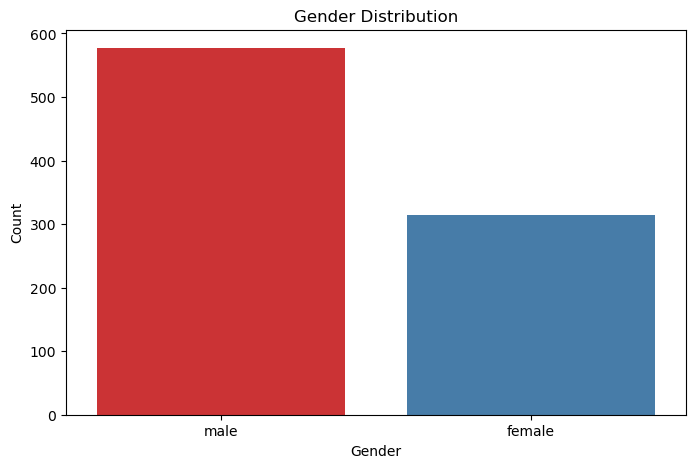

In [10]:
# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sex', palette='Set1')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

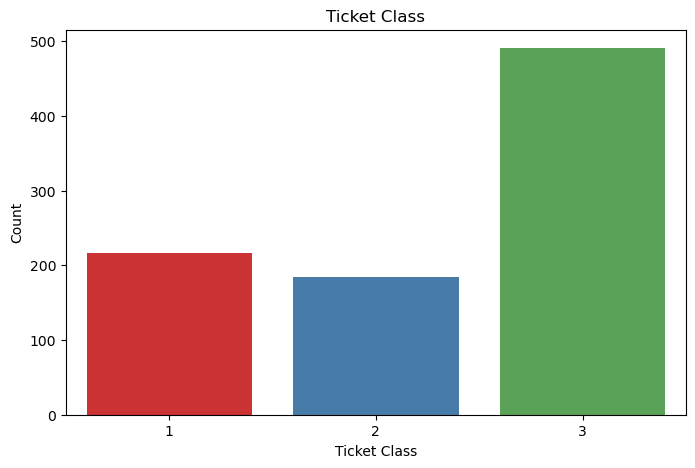

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Pclass', palette='Set1')
plt.title('Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Count')
plt.show()

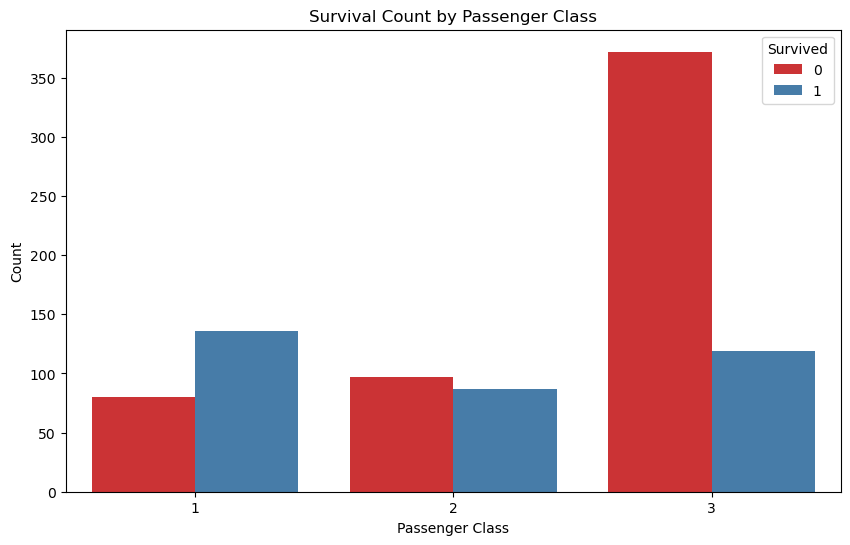

In [12]:
# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set1')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

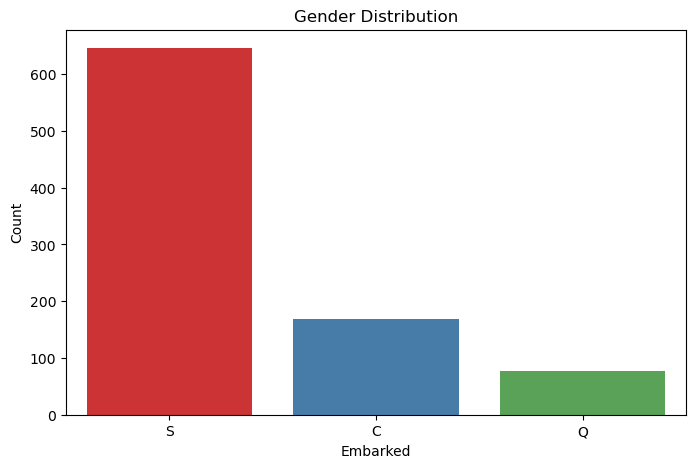

In [13]:
# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Embarked', palette='Set1')
plt.title('Gender Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

In [14]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [15]:
# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2


In [18]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2
720,2,0,6.0,0,1,33.0000,2
39,3,0,14.0,1,0,11.2417,0


In [19]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [20]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree = DecisionTreeClassifier()

In [23]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
pred = dtree.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       105
           1       0.72      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [27]:
pred_2 = dtree.predict(X_train)

In [28]:
print(classification_report(y_train,pred_2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       444
           1       1.00      0.95      0.97       268

    accuracy                           0.98       712
   macro avg       0.98      0.97      0.98       712
weighted avg       0.98      0.98      0.98       712

